In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_excel('Project.xlsx')
df


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [39]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
7555    0
7556    0
7557    0
7558    0
7559    0
Length: 7560, dtype: int64

In [40]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [41]:
cols =list(df.select_dtypes(np.object_).columns)

In [42]:
df[cols] = df[cols].astype('string')

In [43]:
df.dtypes

Date     datetime64[ns]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

# Min max normalization on units and sales

In [44]:
# df['Units'] = (df['Unit'] - df['Unit'].min() ) / (df['Unit'].max() - df['Unit'].min())
# df['Units']

In [45]:
# df['Salesn'] = (df['Sales'] - df['Sales'].min() ) / (df['Sales'].max() - df['Sales'].min())
# df['Salesn']

In [46]:
# df['Salesn'].describe()

In [47]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [48]:
df['Sales'].describe()

count     7560.00
mean     45013.56
std      32253.51
min       5000.00
25%      20000.00
50%      35000.00
75%      65000.00
max     162500.00
Name: Sales, dtype: float64

In [49]:
df['Unit'].describe()

count   7560.00
mean      18.01
std       12.90
min        2.00
25%        8.00
50%       14.00
75%       26.00
max       65.00
Name: Unit, dtype: float64

In [50]:
df['Group'].describe()

count      7560
unique        4
top        Kids
freq       1890
Name: Group, dtype: object

# Pivoting using pivot_table

In [51]:
cols = ('Unit', 'Sales')
df1= pd.pivot_table(df, values= cols, columns= ['Group'], index = ['State'], aggfunc = "sum" )
df1

Sales                                  Unit                        
Group   Kids      Men       Seniors   Women   Kids    Men     Seniors Women  
State                                                                        
NSW    18587500  19022500  18187500  19172500    7435    7609    7275    7669
NT      5700000   5762500   5465000   5652500    2280    2305    2186    2261
QLD     8510000   8392500   8190000   8325000    3404    3357    3276    3330
SA     14515000  14655000  14717500  14970000    5806    5862    5887    5988
TAS     5775000   5757500   5650000   5577500    2310    2303    2260    2231
VIC    26360000  26407500  26315000  26482500   10544   10563   10526   10593
WA      5625000   5752500   5512500   5262500    2250    2301    2205    2105

In [52]:
cols = ('Unit', 'Sales')
df2= pd.pivot_table(df, values= cols, columns= ['State'], index = ['Group'], aggfunc = "sum" )
df2

Sales                                                          \
State         NSW      NT       QLD       SA       TAS       VIC      WA    
Group                                                                       
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000   
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500   
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500   
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500   

         Unit                                       
State     NSW   NT    QLD   SA    TAS    VIC   WA   
Group                                               
Kids     7435  2280  3404  5806  2310  10544  2250  
Men      7609  2305  3357  5862  2303  10563  2301  
Seniors  7275  2186  3276  5887  2260  10526  2205  
Women    7669  2261  3330  5988  2231  10593  2105

# Determining highest sales by states

In [53]:
df3= df.groupby('State').sum(numeric_only=True)
df3

,Unit,Sales
State,,
NSW,29988,74970000
NT,9032,22580000
QLD,13367,33417500
SA,23543,58857500
TAS,9104,22760000
VIC,42226,105565000
WA,8861,22152500


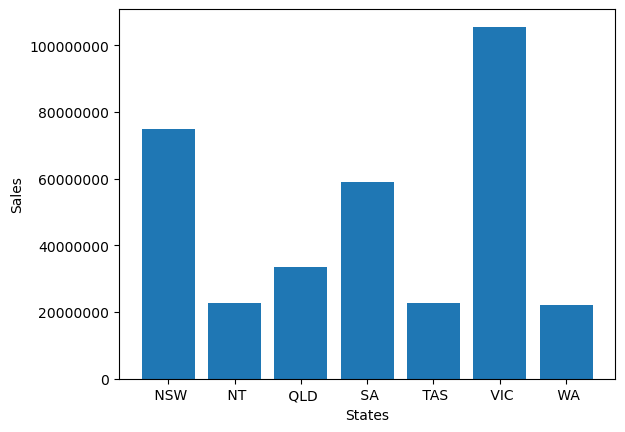

In [54]:
# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ticklabel_format(style='plain')
Groups =df['Group'].unique()
States =[State for State, df in df.groupby('State')]
plt.bar(States, df3['Sales'])
plt.xlabel('States')
plt.ylabel('Sales')
plt.show()

# Highest sales by group

In [55]:
df4= df.groupby('Group').sum(numeric_only=True)
df4

,Unit,Sales
Group,,
Kids,34029,85072500
Men,34300,85750000
Seniors,33615,84037500
Women,34177,85442500


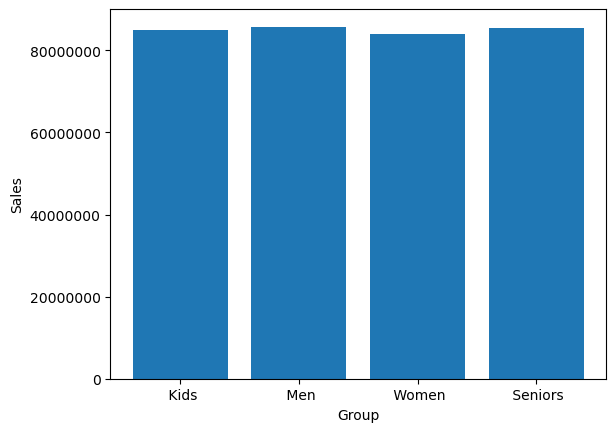

In [56]:
plt.ticklabel_format(style='plain')
Groups =df['Group'].unique()
plt.bar(Groups, df4['Sales'])
plt.xlabel('Group')
plt.ylabel('Sales')
plt.show()

In [57]:
# df3.plot(x='State', y= 'Sales', kind='bar');


In [58]:
# Groups =df['Group'].unique()
# States =df['State'].unique()



# plt.plot(state,sales)
# plt.plot(state,kids)
# plt.plot(state,men)
# plt.plot(state,women);

In [59]:

df5= pd.pivot_table(df, values= ['Sales'], columns= ['State'], index = ['Group'], aggfunc = "sum" )
df5

Sales                                                        
State         NSW      NT       QLD       SA       TAS       VIC      WA 
Group                                                                    
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500

In [60]:
df6= pd.pivot_table(df, values= ['Sales'], columns= ['Group'], index = ['State'], aggfunc = "sum" )
df6

Sales                              
Group   Kids      Men       Seniors   Women  
State                                        
NSW    18587500  19022500  18187500  19172500
NT      5700000   5762500   5465000   5652500
QLD     8510000   8392500   8190000   8325000
SA     14515000  14655000  14717500  14970000
TAS     5775000   5757500   5650000   5577500
VIC    26360000  26407500  26315000  26482500
WA      5625000   5752500   5512500   5262500

In [61]:
# plt.ticklabel_format(style='plain')
# States =[State for State, df in df.groupby('State')]
# Groups =df['Group'].unique()
# plt.xlabel('States')
# plt.ylabel('Sales')
# plt.bar(States,df6['Sales'])
# plt.show()

<Axes: xlabel='State', ylabel='Sales'>

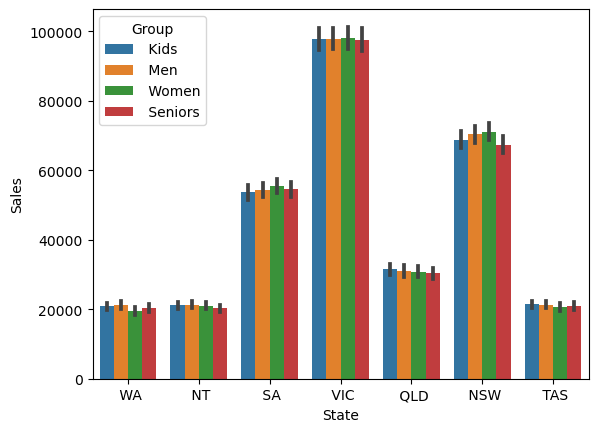

In [62]:
sns.barplot(data=df, x='State', y='Sales', hue='Group')

<Axes: xlabel='State'>

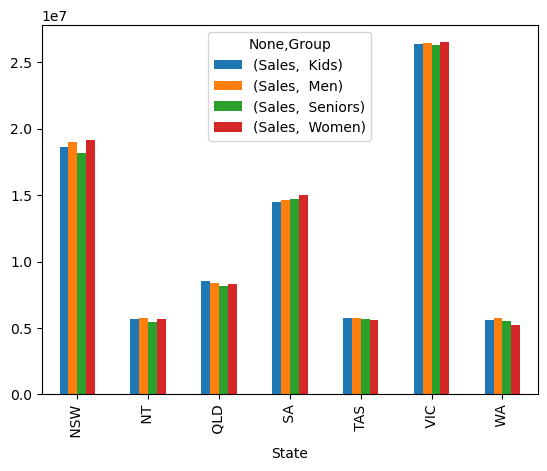

In [63]:

df6.plot(kind='bar')

In [64]:
df7= pd.pivot_table(df, values= ['Sales'], columns= ['State'], index = ['Group'], aggfunc = "sum" )
df7

Sales                                                        
State         NSW      NT       QLD       SA       TAS       VIC      WA 
Group                                                                    
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500

<Axes: xlabel='Group'>

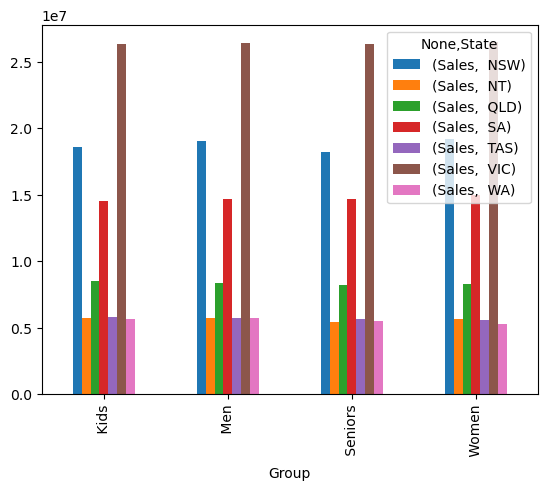

In [65]:
pd.options.display.float_format = '{:.2f}'.format

df7.plot(kind= 'bar')



<Axes: xlabel='Group', ylabel='Sales'>

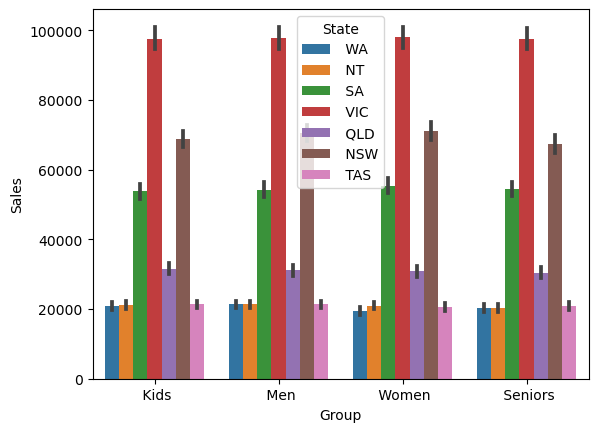

In [66]:
sns.barplot(data=df, x='Group', y='Sales', hue='State')

# Highest sales w.r.t time

In [67]:
df7= df.groupby('Time').sum(numeric_only=True)
df7

,Unit,Sales
Time,,
Afternoon,45603,114007500
Evening,44835,112087500
Morning,45683,114207500


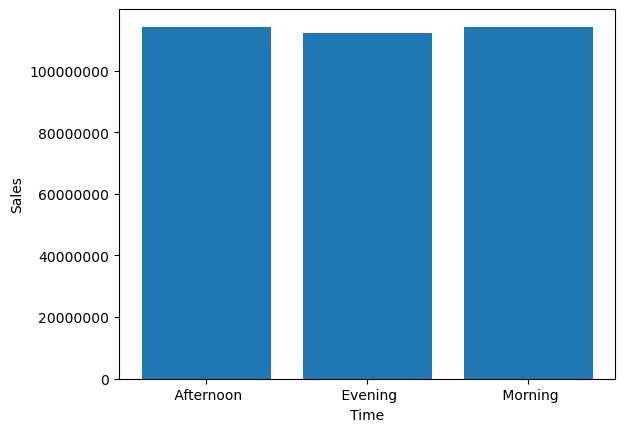

In [68]:
#Mornings had highest sales followed by afternoon and evening time had the least sales.
plt.ticklabel_format(style='plain')
Time =[Time for Time, df in df.groupby('Time')]
plt.bar(Time, df7['Sales'])
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()
#So the best time to Advertise will be morning.

In [69]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.resample('MS').sum(numeric_only = True)

,Unit,Sales
Date,,
2020-10-01,45716,114290000
2020-11-01,36273,90682500
2020-12-01,54132,135330000


In [70]:
df.resample('QS').sum(numeric_only = True)

,Unit,Sales
Date,,
2020-10-01,136121,340302500


In [73]:
df.resample('W').sum(numeric_only = True)

,Unit,Sales
Date,,
2020-10-04,6018,15045000
2020-10-11,10801,27002500
2020-10-18,10656,26640000
2020-10-25,10726,26815000
2020-11-01,8723,21807500
2020-11-08,8346,20865000
2020-11-15,8469,21172500
2020-11-22,8445,21112500
2020-11-29,8591,21477500
